In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import cv2
import numpy as np
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/Cutout_Files.zip

Archive:  /content/drive/MyDrive/Cutout_Files.zip
   creating: Cutout Files/
   creating: Cutout Files/galaxy/
  inflating: Cutout Files/galaxy/IC3521-H01_1260_751_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1300_759_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1326_1169_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1361_946_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1399_1031_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1449_1243_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1536_1206_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1014_1208_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1195_791_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1372_890_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1519_1266_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1821_1270_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_412_1000_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_683_1551_3.jpg  
  inflating: Cutout Files/galaxy/IC

In [ ]:
data = []
labels = []

galaxy_path = glob.glob('/content/Cutout Files/galaxy/*')
star_path = glob.glob('/content/Cutout Files/star/*')

# galaxy images: label 0
i = 0
for x in galaxy_path:
    image = cv2.imread(x, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(0)

# star images: label 1
for x in star_path:
    image = cv2.imread(x, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(1)

data = np.array(data)
labels = np.array(labels)

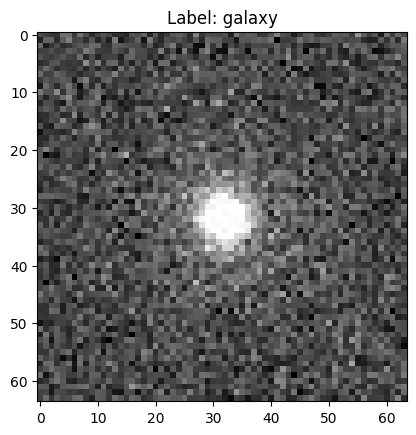

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0])
if labels[0]==0:
  type='galaxy'
plt.title(f"Label: {type}")  # Adding a title with the label information
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

train_data, temp_data, train_labels, temp_labels = train_test_split(data, labels, test_size=0.4, random_state=42)
test_data, valid_data, test_labels, valid_labels = train_test_split(temp_data, temp_labels, test_size=0.75, random_state=42)

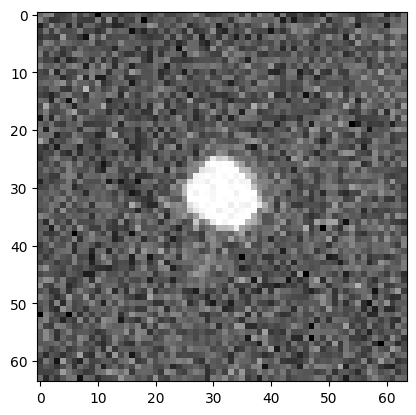

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_x = np.array(train_data)
train_y = np.array(train_labels)
test_x=np.array(test_data)
test_y=np.array(test_labels)
valid_x=np.array(valid_data)
valid_y=np.array(valid_labels)
print("Number of images (After Image Augmentation) in Training set : ",train_x.shape[0],"  Number of images in Testing set : ",test_x.shape[0], "valid", valid_x.shape[0])

Number of images (After Image Augmentation) in Training set :  2391   Number of images in Testing set :  398 valid 1197


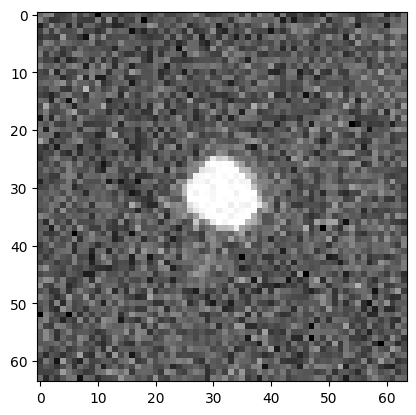

In [ ]:
plt.imshow(train_x[0])

In [ ]:
train_x = train_x.reshape(train_x.shape[0], 3, 64, 64)     #Converting (h,w,c, N) -----> (N,c, h, w )
train_x  = torch.from_numpy(train_x)
train_x = train_x.float()
train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

test_x = test_x.reshape(test_x.shape[0], 3, 64, 64)
test_x  = torch.from_numpy(test_x)
test_x = test_x.float()
test_y = test_y.astype(int)
test_y = torch.from_numpy(test_y)

valid_x = valid_x.reshape(valid_x.shape[0], 3, 64, 64)
valid_x  = torch.from_numpy(valid_x)
valid_x = valid_x.float()
valid_y = valid_y.astype(int)
valid_y = torch.from_numpy(valid_y)

In [ ]:
train_dataset = TensorDataset(train_x, train_y)
valid_dataset = TensorDataset(valid_x, valid_y)
test_dataset = TensorDataset(test_x, test_y)

batch_size = 80

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [ ]:
images.shape

torch.Size([80, 3, 64, 64])

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
num_classes = 2
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

In [ ]:
optimizer = Adam(model.parameters(), lr=0.035)
criterion = CrossEntropyLoss()

In [ ]:
import torch
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


model = model.to(device)
criterion = criterion.to(device)

train_acc_list = []
train_loss_list = []
valid_acc_list = []
valid_loss_list = []
iteration = []

for epoch in range(50):
    train_acc = 0
    train_loss = 0
    valid_acc = 0
    valid_loss = 0

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

        optimizer.zero_grad()

        outputs = model(inputs) #forwarding --Output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        acc = torch.sum(preds == labels).item() / batch_size

        train_acc += acc
        train_loss += loss.item()

    train_acc = train_acc / len(train_loader)
    train_loss = train_loss / len(train_loader)

    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)
    iteration.append(epoch + 1)

    model.eval()

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

            outputs = model(inputs)

            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            acc = torch.sum(preds == labels).item() / batch_size

            valid_acc += acc
            valid_loss += loss.item()

    valid_acc = valid_acc / len(valid_loader)
    valid_loss = valid_loss / len(valid_loader)

    valid_acc_list.append(valid_acc)
    valid_loss_list.append(valid_loss)

    print(f'Epoch {epoch+1}:')
    print(f'Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}')
    print(f'Validation Accuracy: {valid_acc:.4f}, Validation Loss: {valid_loss:.4f}')


Epoch 1:
Training Accuracy: 0.7513, Training Loss: 2.0194
Validation Accuracy: 0.7333, Validation Loss: 196.0564
Epoch 2:
Training Accuracy: 0.7633, Training Loss: 0.8482
Validation Accuracy: 0.7333, Validation Loss: 0.5668
Epoch 3:
Training Accuracy: 0.7292, Training Loss: 1.0592
Validation Accuracy: 0.7325, Validation Loss: 0.5942
Epoch 4:
Training Accuracy: 0.7346, Training Loss: 0.6077
Validation Accuracy: 0.6442, Validation Loss: 0.7606
Epoch 5:
Training Accuracy: 0.7529, Training Loss: 0.5278
Validation Accuracy: 0.7333, Validation Loss: 0.5291
Epoch 6:
Training Accuracy: 0.7667, Training Loss: 0.4839
Validation Accuracy: 0.7383, Validation Loss: 0.5080
Epoch 7:
Training Accuracy: 0.8108, Training Loss: 0.4113
Validation Accuracy: 0.8058, Validation Loss: 0.4329
Epoch 8:
Training Accuracy: 0.8258, Training Loss: 0.3813
Validation Accuracy: 0.8325, Validation Loss: 0.4923
Epoch 9:
Training Accuracy: 0.8529, Training Loss: 0.3425
Validation Accuracy: 0.7800, Validation Loss: 0.6937

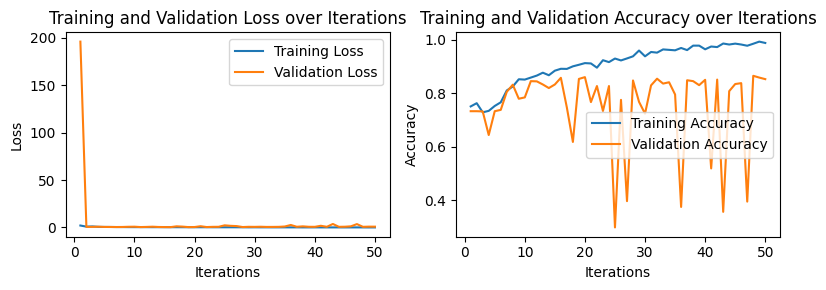

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))

# Plotting loss
axs[0].plot(iteration, train_loss_list, label='Training Loss')
axs[0].plot(iteration, valid_loss_list, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Iterations')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotting IoU
axs[1].plot(iteration, train_acc_list, label='Training Accuracy')
axs[1].plot(iteration, valid_acc_list, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Iterations')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
misclassified = []

model.eval()
model = model.to(device)  # Move model to GPU

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

    outputs = model(inputs)

    _, preds = torch.max(outputs, 1)

    # Indices where the predictions and labels do not match
    wrong = (preds != labels).nonzero(as_tuple=False).squeeze()

    for i in wrong:
        misclassified.append([i.item(), preds[i].item(), labels[i].item()])


In [ ]:
correctly_classified = []

model.eval()
model = model.to(device)  # Move model to GPU

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

    outputs = model(inputs)

    _, preds = torch.max(outputs, 1)

    # Indices where the predictions and labels match (correctly classified)
    correct = (preds == labels).nonzero(as_tuple=False).squeeze()

    for i in correct:
        correctly_classified.append([i.item(), preds[i].item(), labels[i].item()])


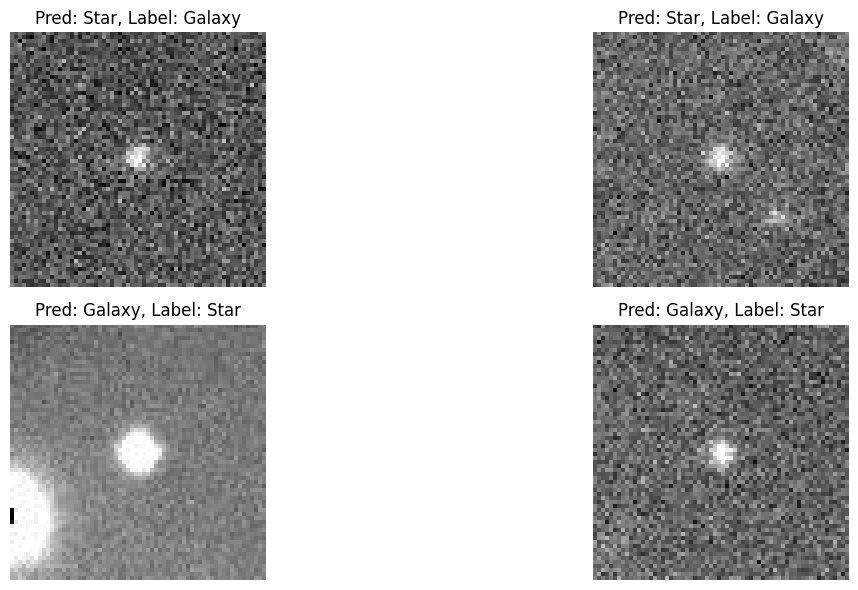

In [ ]:
import matplotlib.pyplot as plt
num_images = 4

fig, axes = plt.subplots(2, num_images//2, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    index, prediction, label = misclassified[i]
    image = test_data[index]
    ax.imshow(image)
    if prediction==1:
      x='Star'
    else:
      x='Galaxy'
    if label==1:
      y='Star'
    else:
      y='Galaxy'
    ax.set_title(f'Pred: {x}, Label: {y}')
    ax.axis('off')
plt.tight_layout()
plt.show()

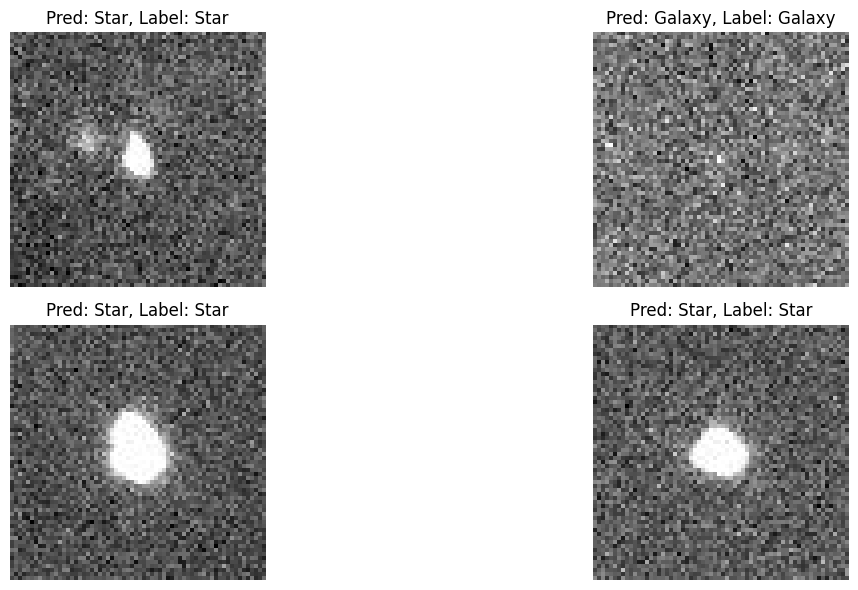

In [ ]:
import matplotlib.pyplot as plt
num_images = 4

fig, axes = plt.subplots(2, num_images//2, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    index, prediction, label = correctly_classified[i]
    image = test_data[index]
    ax.imshow(image)
    if prediction==1:
      x='Star'
    else:
      x='Galaxy'
    if label==1:
      y='Star'
    else:
      y='Galaxy'
    ax.set_title(f'Pred: {x}, Label: {y}')
    ax.axis('off')
plt.tight_layout()
plt.show()

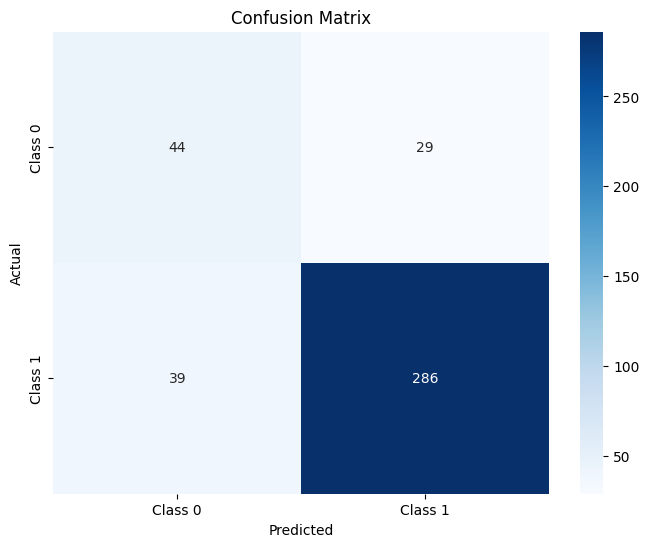

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# test_predictions = []
# test_ground_truth = []


# for inputs, labels in test_loader:
#     inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

#     outputs = model(inputs)

#     _, preds = torch.max(outputs, 1)

#     test_predictions.append(preds.cpu().numpy())
#     test_ground_truth.append(labels.cpu().numpy())


# test_predictions = np.concatenate(test_predictions)
# test_ground_truth = np.concatenate(test_ground_truth)


# conf_matrix = confusion_matrix(test_ground_truth, test_predictions)


# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
#             xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

